<a href="https://colab.research.google.com/github/LBIVeterinary/CABBIO2022/blob/main/Full_Genome_Assembly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Montagem de genomas

Para essa etapa utilizaremos alguns dos arquivos de leituras disponíveis em um repositório público*.

*Dataset* = https://www.ebi.ac.uk/ena/browser/view/PRJNA328823

In [ ]:
#@title
#Tempo de execução (aprox.) = 31 seg
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
#Tempo de execução (aprox.) = 10 min
!conda install -c bioconda multiqc -y
!conda install -c bioconda fastqc -y
!conda install -c bioconda quast -y
!conda install -c bioconda adapterremoval
!apt-get -y install spades

In [ ]:
#Tempo de execução (aprox.) = 8 min
!mkdir Reads

#Reads 01 SRR3924583/K27
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/006/SRR3924596/SRR3924596_1.fastq.gz -O Reads/Mpneumoniae_K27_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/006/SRR3924596/SRR3924596_2.fastq.gz -O Reads/Mpneumoniae_K27_2.fastq.gz

#Reads 02 SRR3924584/FL1
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/003/SRR3924593/SRR3924593_1.fastq.gz -O Reads/Mpneumoniae_FL1_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/003/SRR3924593/SRR3924593_2.fastq.gz -O Reads/Mpneumoniae_FL1_2.fastq.gz

#Reads 03 SRR3924585/M129_2002
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/005/SRR3924635/SRR3924635_1.fastq.gz -O Reads/Mpneumoniae_M129_2002_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/005/SRR3924635/SRR3924635_2.fastq.gz -O Reads/Mpneumoniae_M129_2002_2.fastq.gz

#Reads 04 SRR3924586/FL8
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924587/SRR3924587_1.fastq.gz -O Reads/Mpneumoniae_FL8_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924587/SRR3924587_2.fastq.gz -O Reads/Mpneumoniae_FL8_2.fastq.gz

#Reads 05 SRR3924587/E16
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/001/SRR3924591/SRR3924591_1.fastq.gz -O Reads/Mpneumoniae_E16_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/001/SRR3924591/SRR3924591_2.fastq.gz -O Reads/Mpneumoniae_E16_2.fastq.gz

#Reads 06 SRR3924588/E57
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924647/SRR3924647_1.fastq.gz -O Reads/Mpneumoniae_E57_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924647/SRR3924647_2.fastq.gz -O Reads/Mpneumoniae_E57_2.fastq.gz

#Reads 07 SRR3924589/549
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/005/SRR3924585/SRR3924585_1.fastq.gz -O Reads/Mpneumoniae_549_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/005/SRR3924585/SRR3924585_2.fastq.gz -O Reads/Mpneumoniae_549_2.fastq.gz

#Reads 08 SRR3924590/CO103
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924597/SRR3924597_1.fastq.gz -O Reads/Mpneumoniae_CO103_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924597/SRR3924597_2.fastq.gz -O Reads/Mpneumoniae_CO103_2.fastq.gz

#Reads 09 SRR3924617/FH_2009
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924617/SRR3924617_1.fastq.gz -O Reads/Mpneumoniae_FH_2009_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/007/SRR3924617/SRR3924617_2.fastq.gz -O Reads/Mpneumoniae_FH_2009_2.fastq.gz

#Reads 10 SRR3924617/CO3
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/002/SRR3924632/SRR3924632_1.fastq.gz -O Reads/Mpneumoniae_CO3_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR392/002/SRR3924632/SRR3924632_2.fastq.gz -O Reads/Mpneumoniae_CO3_2.fastq.gz

In [ ]:
#Tempo de execução (aprox.) = 9 min
!fastqc /content/Reads/*.fastq.gz
!multiqc /content/Reads

In [ ]:
#Tempo de execução (aprox.) = 3 min
%cd Reads
!gunzip *.gz
%cd /content/

In [ ]:
#Visualização dos cabeçalhos dos arquivos FASTQ
!head -12 /content/Reads/Mpneumoniae_K27_1.fastq

### **Qualidade antes da trimagem**
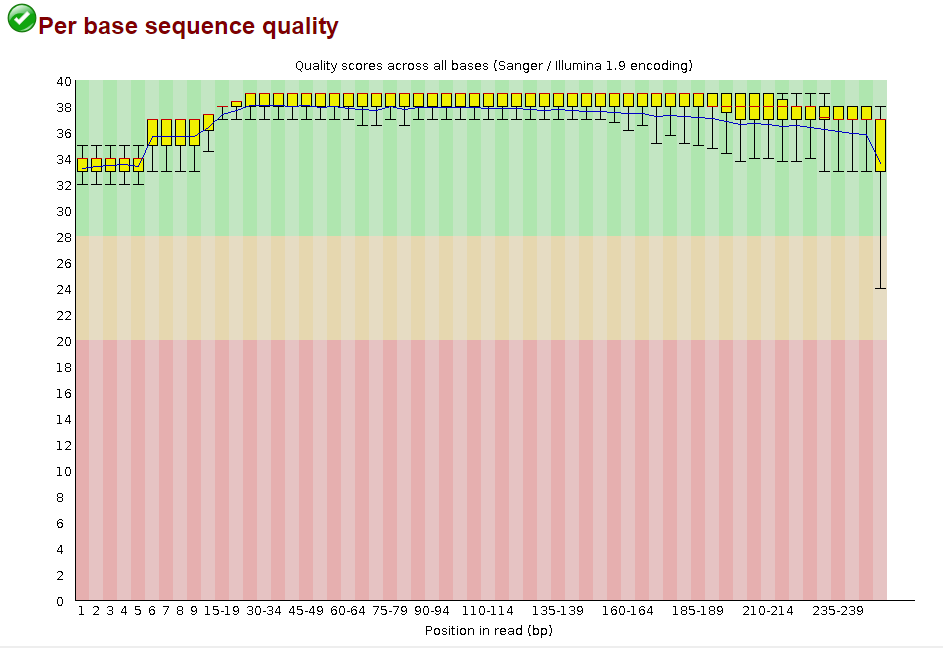

In [ ]:
#Utilização do AdapterRemoval para timagem e remoção de adaptadores
#Tempo de execução (aprox.) = 3 min
!AdapterRemoval --file1 /content/Reads/Mpneumoniae_K27_1.fastq \
--file2 /content/Reads/Mpneumoniae_K27_2.fastq \
--threads 2 \
--basename Mpneumoniae_K27 \
--trimns \
--trimqualities \
--minquality 30 \
--minlength 50 \
--collapse

In [ ]:
!head /content/Mpneumoniae_K27.pair1.truncated

In [ ]:
!mv /content/Mpneumoniae_K27.pair1.truncated /content/Mpneumoniae_K27_1_trimmed.fastq
!mv /content/Mpneumoniae_K27.pair2.truncated /content/Mpneumoniae_K27_2_trimmed.fastq

In [ ]:
!fastqc /content/Mpneumoniae_K27_1_trimmed.fastq
!fastqc /content/Mpneumoniae_K27_2_trimmed.fastq

In [ ]:
!spades -1 /content/Reads/Mpneumoniae_K27_1.fastq -2 /content/Reads/Mpneumoniae_K27_1.fastq -o Mpneumoniae_K27

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/128/185/GCF_002128185.1_ASM212818v1/GCF_002128185.1_ASM212818v1_genomic.fna.gz -O Mpneumoniae_K27.fasta.gz
!gunzip Mpneumoniae_K27.fasta.gz

In [ ]:
!quast -R /content/Mpneumoniae_K27.fasta /content/Mpneumoniae_K27/scaffolds.fasta